In [1]:
%%bash 
ls ../sptial_layer_to_produce_tool/

ETH_DEM30m.tfw
ETH_DEM30m.tif
ppt32.tfw
ppt32.tif
ppt32.tif.aux.xml
ppt32.tif.ovr
ppt32.tif.xml
Slope_perc_int.tif
Slope_perc_int.tif.aux.xml
TAXOUSDA_250m.tif
Technology decision tool.xlsx


In [2]:
import rasterio as rio
from rasterio.plot import show
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
import rasterio.features as rioFeatures
import rasterio.warp as rioWarp

In [4]:
import folium

In [5]:
def get_GeoJSON_shape(tagged_image_file, coord_ref_sys = "EPSG:4326"):
    mask = tagged_image_file.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rioFeatures.shapes(
            mask, transform=tagged_image_file.transform):
        geom = rioWarp.transform_geom(tagged_image_file.crs, coord_ref_sys, geom, precision=6)
        return geom

##### Elevation Layer

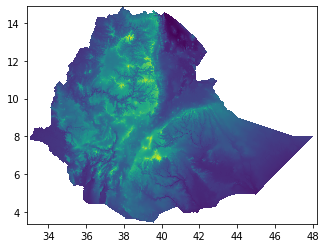

driver :  GTiff
dtype :  int16
nodata :  32767.0
width :  8370
height :  6284
count :  1
crs :  EPSG:4326
transform :  | 0.00, 0.00, 32.86|
| 0.00,-0.00, 14.89|
| 0.00, 0.00, 1.00|
blockxsize :  128
blockysize :  128
tiled :  True
interleave :  band
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 32767.0, 'width': 8370, 'height': 6284, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00183398290804968, 0.0, 32.8599563221203,
       0.0, -0.00183398290804968, 14.888557329617818)}


In [6]:
try:
    elevation_layer = rio.open("../sptial_layer_to_produce_tool/ETH_DEM30m.tif")
    show(elevation_layer)
    for attr in elevation_layer.profile.keys():
        print(attr,": ",elevation_layer.profile[attr])
    print(elevation_layer.meta)
except:
    print("File not found")

In [7]:
elevation_layer.crs

CRS.from_epsg(4326)

In [8]:
metadata_elevation_layer = pd.DataFrame.from_dict(data = {attr : elevation_layer.profile[attr] for attr in elevation_layer.profile.keys()}, orient = "index").transpose()
metadata_elevation_layer["crs"] = str(elevation_layer.profile["crs"])
metadata_elevation_layer.insert(1, "coordinate", get_GeoJSON_shape(elevation_layer, coord_ref_sys = elevation_layer.crs)["coordinates"])
metadata_elevation_layer.insert(0, "name", "Elevation Layer", True)
metadata_elevation_layer

,name,driver,coordinate,dtype,nodata,width,height,count,crs,transform,blockxsize,blockysize,tiled,interleave
0,Elevation Layer,GTiff,"[[42.394833, 12.480538], [42.394833, 12.478704...",int16,32767,8370,6284,1,EPSG:4326,"(0.00183398290804968, 0.0, 32.8599563221203, 0...",128,128,True,band


In [9]:

metadata_elevation_layer = metadata_elevation_layer.assign(coordinates = get_GeoJSON_shape(elevation_layer, coord_ref_sys=elevation_layer.crs)["coordinates"])


##### Precipitation Layer

In [10]:
try:
    precipitation_layer = rio.open("../sptial_layer_to_produce_tool/ppt32.tif")
#     plt(precipitationLayer)
    for attr in precipitation_layer.profile.keys():
        print(attr,": ",precipitation_layer.profile[attr])
except:
    print("File not found")

driver :  GTiff
dtype :  int16
nodata :  0.0
width :  1795
height :  1373
count :  12
crs :  EPSG:4326
transform :  | 0.01, 0.00, 33.00|
| 0.00,-0.01, 14.84|
| 0.00, 0.00, 1.00|
blockxsize :  128
blockysize :  128
tiled :  True
interleave :  pixel


In [11]:
metadata_precipitation_layer = pd.DataFrame.from_dict(data = {attr : precipitation_layer.profile[attr] for attr in precipitation_layer.profile.keys()}, orient = "index").transpose()
metadata_precipitation_layer["crs"] = str(precipitation_layer.profile["crs"])
metadata_precipitation_layer.insert(1, "coordinate", get_GeoJSON_shape(precipitation_layer, coord_ref_sys = precipitation_layer.crs)["coordinates"])
metadata_precipitation_layer.insert(0, "name", "Precipitation Layer", True)
metadata_precipitation_layer

,name,driver,coordinate,dtype,nodata,width,height,count,crs,transform,blockxsize,blockysize,tiled,interleave
0,Precipitation Layer,GTiff,"[[32.999915, 14.841697], [32.999915, 7.941699]...",int16,0,1795,1373,12,EPSG:4326,"(0.008333329999999998, 0.0, 32.9999148, 0.0, -...",128,128,True,pixel


##### Topographic Slope Layer

In [12]:
try:
    topographic_slope_layer = rio.open("../sptial_layer_to_produce_tool/Slope_perc_int.tif")
#     show(topographicSlopeLayer)
    for attr in topographic_slope_layer.profile.keys():
        print(attr,": ",topographic_slope_layer.profile[attr])
except:
    print("File not found")

driver :  GTiff
dtype :  uint16
nodata :  None
width :  53596
height :  41323
count :  1
crs :  EPSG:32637
transform :  | 31.10, 0.00,-167562.62|
| 0.00,-31.10, 1660735.06|
| 0.00, 0.00, 1.00|
tiled :  False
interleave :  band


In [13]:
metadata_topographic_slope_layer = pd.DataFrame.from_dict(data = {attr : topographic_slope_layer.profile[attr] for attr in topographic_slope_layer.profile.keys()}, orient = "index").transpose()
metadata_topographic_slope_layer["crs"] = str(topographic_slope_layer.profile["crs"])
metadata_topographic_slope_layer.insert(1, "coordinate", get_GeoJSON_shape(topographic_slope_layer, coord_ref_sys=topographic_slope_layer.crs)["coordinates"])
metadata_topographic_slope_layer.insert(0, "name", "Topographic Slope Layer", True)
metadata_topographic_slope_layer

,name,driver,coordinate,dtype,nodata,width,height,count,crs,transform,tiled,interleave
0,Topographic Slope Layer,GTiff,"[[-167562.6226, 1660735.0593], [-167562.6226, ...",uint16,None,53596,41323,1,EPSG:32637,"(31.09831804798866, 0.0, -167562.6226, 0.0, -3...",False,band


##### Soil Texture Type Layer

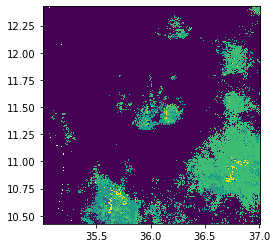

driver :  GTiff
dtype :  uint8
nodata :  255.0
width :  960
height :  960
count :  1
crs :  EPSG:4326
transform :  | 0.00, 0.00, 35.01|
| 0.00,-0.00, 12.43|
| 0.00, 0.00, 1.00|
tiled :  False
interleave :  band


In [14]:
try:
    soil_texture_layer = rio.open("../sptial_layer_to_produce_tool/TAXOUSDA_250m.tif")
    show(soil_texture_layer)
    for attr in soil_texture_layer.profile.keys():
        print(attr,": ",soil_texture_layer.profile[attr])
except:
    print("File not found")

In [15]:
metadata_soil_texture_layer = pd.DataFrame.from_dict(data = {attr : soil_texture_layer.profile[attr] for attr in soil_texture_layer.profile.keys()}, orient = "index").transpose()
metadata_soil_texture_layer["crs"] = str(soil_texture_layer.profile["crs"])
metadata_soil_texture_layer.insert(1, "coordinate", get_GeoJSON_shape(soil_texture_layer, coord_ref_sys = soil_texture_layer.crs)["coordinates"])
metadata_soil_texture_layer.insert(0, "name", "Soil Texture Layer", True)
metadata_soil_texture_layer

,name,driver,coordinate,dtype,nodata,width,height,count,crs,transform,tiled,interleave
0,Soil Texture Layer,GTiff,"[[35.064549, 12.422095], [35.064549, 12.420012...",uint8,255,960,960,1,EPSG:4326,"(0.0020833330000009018, 0.0, 35.01038226509306...",False,band


In [16]:
Land_Mangement_Metadata = pd.concat([metadata_elevation_layer, metadata_precipitation_layer, metadata_soil_texture_layer, metadata_topographic_slope_layer], sort = False)
Land_Mangement_Metadata

,name,driver,coordinate,dtype,nodata,width,height,count,crs,transform,blockxsize,blockysize,tiled,interleave,coordinates
0,Elevation Layer,GTiff,"[[42.394833, 12.480538], [42.394833, 12.478704...",int16,32767,8370,6284,1,EPSG:4326,"(0.00183398290804968, 0.0, 32.8599563221203, 0...",128,128,True,band,"[[42.394833, 12.480538], [42.394833, 12.478704..."
0,Precipitation Layer,GTiff,"[[32.999915, 14.841697], [32.999915, 7.941699]...",int16,0,1795,1373,12,EPSG:4326,"(0.008333329999999998, 0.0, 32.9999148, 0.0, -...",128,128,True,pixel,NaN
0,Soil Texture Layer,GTiff,"[[35.064549, 12.422095], [35.064549, 12.420012...",uint8,255,960,960,1,EPSG:4326,"(0.0020833330000009018, 0.0, 35.01038226509306...",NaN,NaN,False,band,NaN
0,Topographic Slope Layer,GTiff,"[[-167562.6226, 1660735.0593], [-167562.6226, ...",uint16,None,53596,41323,1,EPSG:32637,"(31.09831804798866, 0.0, -167562.6226, 0.0, -3...",NaN,NaN,False,band,NaN


In [17]:
Land_Mangement_Metadata.to_csv("Land_Management_Files_Metadata.csv", header=True)

In [18]:
# print([ coordinate for coordinate in Land_Mangement_Metadata["coordinates"]])
Land_Mangement_Metadata["coordinates"][0]

0    [[42.394833, 12.480538], [42.394833, 12.478704...
0                                                  NaN
0                                                  NaN
0                                                  NaN
Name: coordinates, dtype: object

### Vis

In [19]:
from shapely.geometry import MultiPolygon, Polygon

In [20]:
def polygon_from_coordinates(coordinates):
    longitude_points = [point[0] for point in coordinates[0]]
    latitude_points = [point[1] for point in coordinates[0]]
    return Polygon(zip(longitude_points, latitude_points))

In [ ]:
pre_poly = polygon_from_coordinates(prec_shape["coordinates"])
pre_poly

In [ ]:
ele_poly = polygon_from_coordinates(metadata_elevation_layer["coordinates"])
ele_poly

In [ ]:
topo_poly = polygon_from_coordinates(metadata_topographic_slope_layer["coordinates"])
topo_poly

In [ ]:


footprint = None
for fp in Polygon(prec_shape["coordinates"]):
    footprint = fp
footprint

In [ ]:
eth_map = folium.Map(location = [9.05, 38.76], zoom_start = 5)
# eth_map.geo_json(geo_path = topographicSlopeLayer_shape)
# for coordinate in Land_Mangement_Metadata["coordinates"]:
#     folium.GeoJson(coordinate).add_to(eth_map)
# folium.Choropleth(geo_data = [coordinate for coordinate in Land_Mangement_Metadata["coordinates"]], fill_color = "YlGn").add_to(eth_map)
# elev_shape = get_GeoJSON_shape(elevation_layer)
# soil_shape = get_GeoJSON_shape(soil_texture_layer)
# topo_shape = get_GeoJSON_shape(topographic_slope_layer)

folium.GeoJson(pre_poly).add_to(eth_map)
# folium.GeoJson(ele_poly).add_to(eth_map)
# folium.GeoJson(topo_poly).add_to(eth_map)
folium.LatLngPopup().add_to(eth_map)
# folium.GeoJson(prec_shape).add_to(eth_map)

eth_map

In [ ]:
%%bash
ls

In [ ]:
from rasterio.transform import from_origin
with rasterio.open(
     'example.tif', 'w', driver='GTiff', dtype='uint16',
     width=720, height=360, count=8, crs='EPSG:4326',
     transform=from_origin(-180.0, 90.0, 0.5, 0.5),
     nodata=0, tiled=True, compress='lzw') as dataset:
dataset.write(...)

In [ ]:
import geopandas as gpd

In [ ]:
gpd.read_file("../sptial_layer_to_produce_tool/ETH_DEM30m.tif")

In [ ]:
import fiona

In [ ]:
with fiona.open("../sptial_layer_to_produce_tool/ETH_DEM30m.tif") as elev:
    print(elev.meta)